# Imdb movies scrapping with sentiment analysis

## Scrapping movies' data
## Importing needed libraries

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm.auto import tqdm

### Requesting and scrapping  data

In [5]:
#Initialing
movies_index=1
movie_content_list = []
url = "https://www.imdb.com/search/title/?title_type=feature&genres=sci-fi&sort=num_votes,desc&count=250"
resp = requests.get(url)
movies_content = BeautifulSoup(resp.content, 'lxml')

with tqdm(total=812) as pbar:
    while len(movie_content_list) < 800 :
        movies_index = movies_index + 250
        #scrapping and organizing data into dictionnary
        for movie in movies_content.select('.lister-item-content'):

            #Decomposing the scrapped web page into key:value dictionary
            try:
                data = {
            "id": movie.find('a', href=True)['href'],
            "title":movie.select('.lister-item-header a')[0].get_text().strip(),
            "year":movie.select('.lister-item-year')[0].get_text().strip(),
            "genre":movie.select('.genre')[0].get_text().strip(),
            "certificate":movie.select('.certificate')[0].get_text().strip(),
            "time":movie.select('.runtime')[0].get_text().strip(),
            "ImdbRating":movie.select('.ratings-imdb-rating')[0].get_text().strip(),
            "metascore":movie.select('.ratings-metascore span')[0].get_text().strip(),
            "votes":movie.select('.sort-num_votes-visible span')[1].get_text().strip(),
            "simple_desc":movie.select('.text-muted')[2].get_text().strip(),
                }
                #Updating TQDM progress bar
                pbar.update(1)
            #Skip if the movie is missing any of the needed values
            except IndexError:
                continue

            #adding the dictionary to a list of dictionaries
            movie_content_list.append(data)

        #updating the url to next page and re-running the request and scrapping
        url = f"https://www.imdb.com/search/title/?title_type=feature&genres=sci-fi&sort=num_votes,desc&count=250&amp;start={movies_index}&amp;ref_=adv_nxt"
        resp = requests.get(url)
        movies_content = BeautifulSoup(resp.content, 'lxml')


  0%|          | 0/812 [00:00<?, ?it/s]

### Converting to Dataframe and cleaning


In [6]:
# Converting to Dataframe
movies_df = pd.DataFrame(movie_content_list)
movies_df

,id,title,year,genre,certificate,time,ImdbRating,metascore,votes,simple_desc
0,/title/tt1375666/,Inception,(2010),"Action, Adventure, Sci-Fi",PG-13,148 min,8.8,74,"2,340,483",A thief who steals corporate secrets through t...
1,/title/tt0133093/,The Matrix,(1999),"Action, Sci-Fi",R,136 min,8.7,73,"1,906,046",When a beautiful stranger leads computer hacke...
2,/title/tt0816692/,Interstellar,(2014),"Adventure, Drama, Sci-Fi",PG-13,169 min,8.6,74,"1,815,557",A team of explorers travel through a wormhole ...
3,/title/tt0848228/,The Avengers,(2012),"Action, Adventure, Sci-Fi",PG-13,143 min,8.0,69,"1,388,292",Earth's mightiest heroes must come together an...
4,/title/tt0076759/,Star Wars,(1977),"Action, Adventure, Fantasy",PG,121 min,8.6,90,"1,360,825",Luke Skywalker joins forces with a Jedi Knight...
...,...,...,...,...,...,...,...,...,...,...
808,/title/tt0816539/,Jack Brooks: Monster Slayer,(2007),"Action, Comedy, Horror",R,85 min,5.9,46,"6,454",A troubled young man still mourning the childh...
809,/title/tt5737536/,Future World,(2018),"Action, Adventure, Sci-Fi",R,88 min,3.2,10,"6,418",A young boy searches a future world wasteland ...
810,/title/tt0165874/,The Mating Habits of the Earthbound Human,(1999),"Comedy, Sci-Fi",R,88 min,6.3,26,"6,330",An anthropologist from an alien planet provide...
811,/title/tt0055608/,Voyage to the Bottom of the Sea,(1961),"Action, Adventure, Sci-Fi",PG,105 min,6.0,49,"6,247",When the Earth is threatened by a burning Van ...


### Cleaning The Dataframe

In [7]:
movies_df .dtypes

id             object
title          object
year           object
genre          object
certificate    object
time           object
ImdbRating     object
metascore      object
votes          object
simple_desc    object
dtype: object

In [8]:
#changing columns Types to string
movies_df  = movies_df .astype('string')

In [9]:
#removing the uneeded characters from the id
movies_df['id'] = movies_df['id'].str[7:-1]

In [10]:
#removing characters from the yeaer and converting it to integer
movies_df ['year'] = movies_df ['year'].str.extract('(\d+)').astype(int)

In [11]:
#converting the rating to float
movies_df ['ImdbRating'] = movies_df ['ImdbRating'].astype(float)

In [12]:
#removing the text from the votes and converting it to integer
movies_df ['votes'] = movies_df ['votes'].str.replace(',','').astype(int)

In [13]:
#removing the text from the runtime and converting it to integer
movies_df ['time'] = movies_df ['time'].str[0:-3].astype(int)

In [14]:
#checking if the types have changed
movies_df.dtypes

id              string
title           string
year             int32
genre           string
certificate     string
time             int32
ImdbRating     float64
metascore       string
votes            int32
simple_desc     string
dtype: object

In [15]:
#Printing the dataframe
movies_df

,id,title,year,genre,certificate,time,ImdbRating,metascore,votes,simple_desc
0,tt1375666,Inception,2010,"Action, Adventure, Sci-Fi",PG-13,148,8.8,74,2340483,A thief who steals corporate secrets through t...
1,tt0133093,The Matrix,1999,"Action, Sci-Fi",R,136,8.7,73,1906046,When a beautiful stranger leads computer hacke...
2,tt0816692,Interstellar,2014,"Adventure, Drama, Sci-Fi",PG-13,169,8.6,74,1815557,A team of explorers travel through a wormhole ...
3,tt0848228,The Avengers,2012,"Action, Adventure, Sci-Fi",PG-13,143,8.0,69,1388292,Earth's mightiest heroes must come together an...
4,tt0076759,Star Wars,1977,"Action, Adventure, Fantasy",PG,121,8.6,90,1360825,Luke Skywalker joins forces with a Jedi Knight...
...,...,...,...,...,...,...,...,...,...,...
808,tt0816539,Jack Brooks: Monster Slayer,2007,"Action, Comedy, Horror",R,85,5.9,46,6454,A troubled young man still mourning the childh...
809,tt5737536,Future World,2018,"Action, Adventure, Sci-Fi",R,88,3.2,10,6418,A young boy searches a future world wasteland ...
810,tt0165874,The Mating Habits of the Earthbound Human,1999,"Comedy, Sci-Fi",R,88,6.3,26,6330,An anthropologist from an alien planet provide...
811,tt0055608,Voyage to the Bottom of the Sea,1961,"Action, Adventure, Sci-Fi",PG,105,6.0,49,6247,When the Earth is threatened by a burning Van ...


In [16]:
#Converting to csv
movies_df.to_csv("movies_df.csv")

## Movies analysis and visualization
### Certificates visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
movies_df_vis = movies_df
movies_df_vis = movies_df_vis.groupby(['certificate']).count()
movies_df_vis = movies_df_vis['id']
movies_df_vis=movies_df_vis.reset_index()

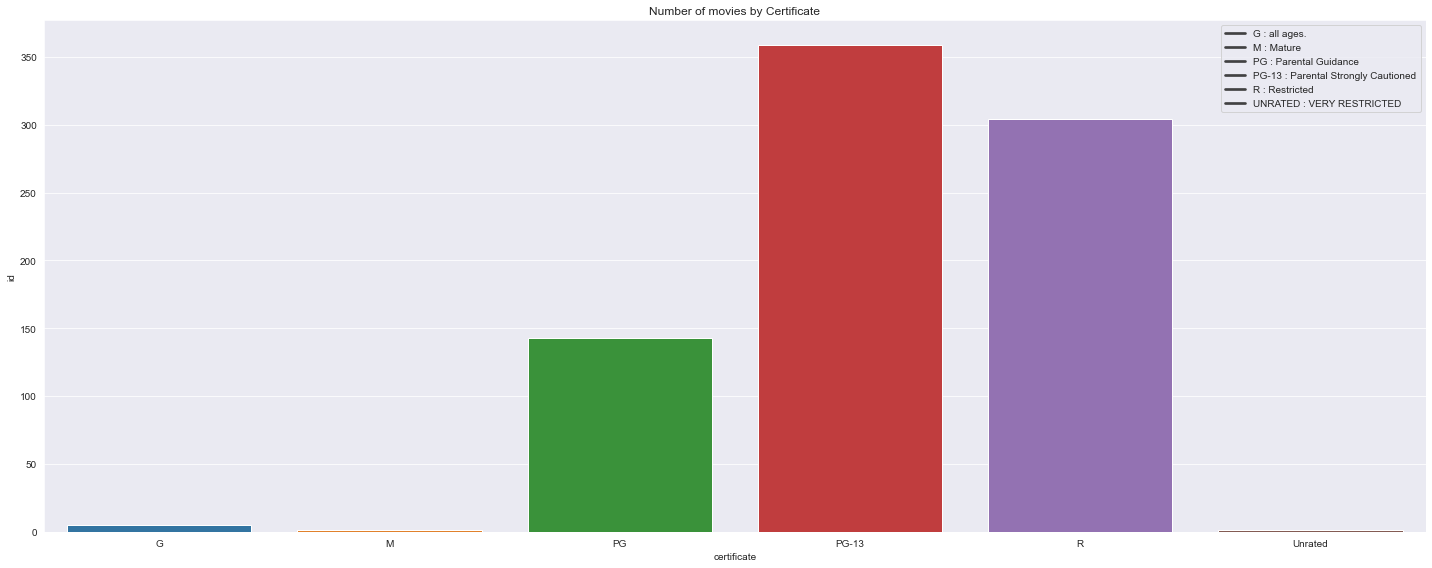

In [19]:
fig, axs = plt.subplots(1, figsize=(20, 8))
sns.barplot(data=movies_df_vis, x='certificate', y='id', ax=axs)
axs.set_title('Number of movies by Certificate')
plt.tight_layout()
plt.legend (labels=["G : all ages.","M : Mature","PG : Parental Guidance","PG-13 : Parental Strongly Cautioned","R : Restricted","UNRATED : VERY RESTRICTED"])

plt.show()

### Movies per year visualization

In [20]:
movies_df_vis = movies_df
movies_df_vis = movies_df_vis.groupby(['year']).count()
movies_df_vis = movies_df_vis['id']
movies_df_vis = movies_df_vis.reset_index()

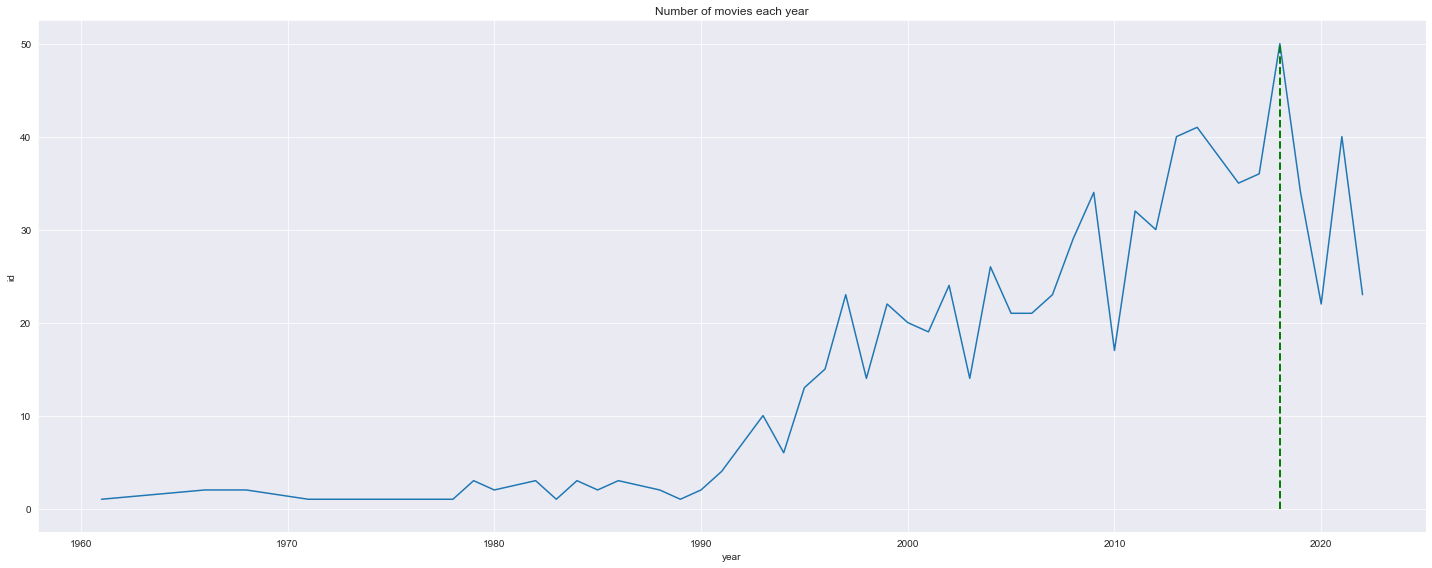

In [21]:
fig, axs = plt.subplots(1, figsize=(20, 8))
ax = sns.lineplot(data=movies_df_vis, x='year', y='id', ax=axs)
kdeline = ax.lines[0]
axs.set_title('Number of movies each year')
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
mode_idx = np.argmax(ys)
plt.tight_layout()
ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='green', ls='--', lw=2)

plt.show()

## Requesting and scrapping reviews' data
### Importing needed libraries

In [22]:
from lxml import etree

### Scrapping Reviews function

In [23]:
def scrapping_movie_reviews(movie_id):
    df_review_content = []
    url =  f"https://www.imdb.com/title/{movie_id}/reviews?spoiler=hide&sort=totalVotes&dir=desc&ratingFilter=0"
    resp = requests.get(url)
    review_content = BeautifulSoup(resp.content, 'lxml')
    review_content_converted = etree.HTML(str(review_content))
    data_ajaxurl = review_content_converted.xpath('//*[@class="load-more-data"]/@data-ajaxurl')[0]
    with tqdm(total=613) as pbar:

        while True:
            resp = requests.get(url)
            #Converting the response to Beautiful Soup Object
            review_content = BeautifulSoup(resp.content, 'lxml')
            review_content_converted = etree.HTML(str(review_content))

            for review in review_content.select('.lister-item-content'):
                try:
                # Creating a python dictonary
                    data = {
                    "rating":review.select('.rating-other-user-rating span')[0].get_text().strip(),
                    "title": review.select('.title')[0].get_text().strip(),
                    "review": review.select('.show-more__control')[0].get_text().strip(),
                    }
                except IndexError:
                    continue
                #Updating TQDM progress bar
                pbar.update(1)
                df_review_content.append(data)
            try:
                pagination_key = review_content_converted.xpath('//*[@class="load-more-data"]/@data-key')[0]
                url = f"https://www.imdb.com{data_ajaxurl}&paginationKey={pagination_key}"
            except IndexError:
                break
    reviews = pd.DataFrame(df_review_content)
    reviews = reviews.reset_index()
    reviews['rating'] = reviews['rating'].astype(int)
    return reviews

## Creating reviews Dataframe for the top 5 sci-fi Movies

## Reviews sentiment analysis using ROBERTA
### Importing needed libraries

In [24]:
from transformers import AutoModelForSequenceClassification
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import nltk

### Initializing needed variables

In [25]:
sia = SentimentIntensityAnalyzer()
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

## Creating roberta score calculator function

In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'neg' : scores[0],
        'neu' : scores[1],
        'pos' : scores[2]
    }
    return scores_dict

## Creating sentiment analysis to top 5 movies

In [27]:
movies = list(movies_df['id'].head(5))

### First Movie : INCEPTION

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

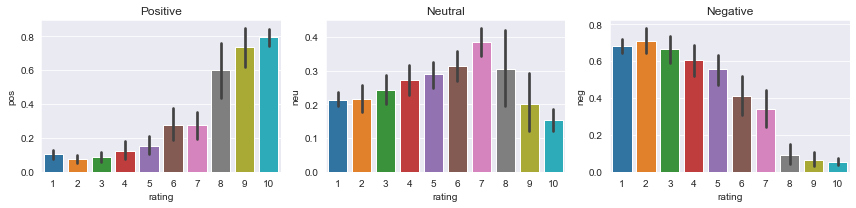

In [28]:
reviews = scrapping_movie_reviews(movies[0])
reviews = reviews.head(500)
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['review']
        myid = row['index']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError :
        continue
    except IndexError:
        continue

Inception = pd.DataFrame(res).T
Inception = Inception.reset_index()
Inception = Inception.merge(reviews, how='left')
Inception = Inception.sort_values('index')
Inception.to_csv('Inception.csv')
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Inception, x='rating', y='pos', ax=axs[0])
sns.barplot(data=Inception, x='rating', y='neu', ax=axs[1])
sns.barplot(data=Inception, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [29]:
#Printing the dataframe
Inception

,index,neg,neu,pos,rating,title,review
0,1,0.138912,0.461611,0.399478,10,Incredible-Nolan keeps improving and Inception...,"I saw Memento very recently, something that tu..."
1,4,0.002743,0.024029,0.973228,10,"Amazing Directing, Captivating Plot, Overall G...",I had the privilege of seeing this movie befor...
2,9,0.506083,0.387558,0.106359,1,"A fake ""thinking person's movie""","I cannot phrase it better, so I will quote Rex..."
3,10,0.948451,0.044433,0.007116,1,So bad,My high expectations of this movie based on it...
4,12,0.693166,0.251815,0.055019,1,A nightmare.,"This movie is a disaster on many levels, but w..."
...,...,...,...,...,...,...,...
404,495,0.069364,0.368653,0.561984,10,"Imaginative and visually stunning, one of the ...",This movie was awesome. It even made me forget...
405,496,0.008223,0.285621,0.706156,10,Inception,"In Inception, we are taken on a deep and highl..."
406,497,0.004153,0.027832,0.968014,10,best time killer,Very refreshing to see how it begins and ends ...
407,498,0.262096,0.391195,0.346709,10,You'll wonder how you ever doubted this movie.,When I first saw trailers for Inception a coup...


### 2nd Movie : THE MATRIX

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

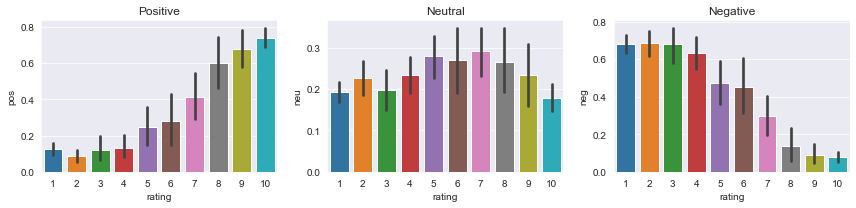

In [30]:
reviews = scrapping_movie_reviews(movies[1])
reviews = reviews.head(500)
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['review']
        myid = row['index']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError :
        continue
    except IndexError:
        continue

Matrix = pd.DataFrame(res).T
Matrix = Matrix.reset_index()
Matrix = Matrix.merge(reviews, how='left')
Matrix = Matrix.sort_values('index')
Matrix.to_csv('Matrix.csv')
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Matrix, x='rating', y='pos', ax=axs[0])
sns.barplot(data=Matrix, x='rating', y='neu', ax=axs[1])
sns.barplot(data=Matrix, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [31]:
#Printing the dataframe
Matrix

,index,neg,neu,pos,rating,title,review
0,2,0.002285,0.016153,0.981563,10,Stunning and wild...,It's been a while since a movie has generated ...
1,3,0.003712,0.049750,0.946538,10,Raises the bar for sci-fi films for years to come,The Wachowski Brothers vision of a possible fu...
2,4,0.014025,0.081349,0.904626,10,"The more you watch it, the better it gets",The Wachowski brothers really did excel themse...
3,5,0.028027,0.174359,0.797615,8,Guns. Leather. Keanu Reeves. How cool can it get?,You walk into this film not knowing what the M...
4,6,0.080776,0.612541,0.306683,9,The Matrix has Buddhist themes,A large part of the appeal of 'The Matrix' for...
...,...,...,...,...,...,...,...
455,495,0.002076,0.025216,0.972708,10,Amazing movie,Amazing movie and so relevant to the world we ...
456,496,0.198098,0.323388,0.478514,7,I Expected More,"Plot: the base idea is amazing, sincerely but ..."
457,497,0.294955,0.562168,0.142877,8,Lets not forget the creators were called The W...,Amazing how history gets rewritten at the whim...
458,498,0.003303,0.020459,0.976238,7,Amazing!,The kind of movie you can watch in a loop.\nAm...


### 3rd Movie : Interstellar

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

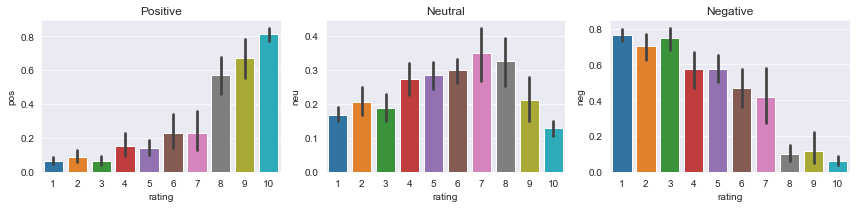

In [32]:
reviews = scrapping_movie_reviews(movies[2])
reviews = reviews.head(500)
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['review']
        myid = row['index']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError :
        continue
    except IndexError:
        continue

Interstellar = pd.DataFrame(res).T
Interstellar = Interstellar.reset_index()
Interstellar = Interstellar.merge(reviews, how='left')
Interstellar = Interstellar.sort_values('index')
Interstellar.to_csv("Interstellar.csv")
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Interstellar, x='rating', y='pos', ax=axs[0])
sns.barplot(data=Interstellar, x='rating', y='neu', ax=axs[1])
sns.barplot(data=Interstellar, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [33]:
#Printing the dataframe
Interstellar

,index,neg,neu,pos,rating,title,review
0,3,0.040598,0.074440,0.884962,10,I waited 5 years to watch it again,After watching this insane movie in the theatr...
1,4,0.018842,0.121747,0.859411,10,The GENIUS shocks the world by another unique ...,(((WOW)))...!!!It's almost impossible to put i...
2,6,0.004615,0.037071,0.958314,10,Best movie I have seen in my life,"This movie was the best written, acted, visual..."
3,7,0.032201,0.112654,0.855145,10,'Interstellar',"'Interstellar' was incredible. The visuals, th..."
4,8,0.050087,0.246094,0.703819,10,Epic in every way!,Just watched Interstellar in imax 70mm. Scienc...
...,...,...,...,...,...,...,...
440,495,0.798058,0.173482,0.028460,3,Where do I even begin?,Having just seen this with my fellow movie buf...
441,496,0.050330,0.130688,0.818982,10,My favourite movie,This is actually my nº 1 movie in the best eve...
442,497,0.569291,0.321239,0.109470,6,Relativity slows down time in the movie till y...,"OK, I get it ! It's a Nolan movie so everyone ..."
443,498,0.219790,0.344930,0.435280,6,disappointed,"First, I like all works of Christopher Nolan. ..."


### 4th movie : The Avengers

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

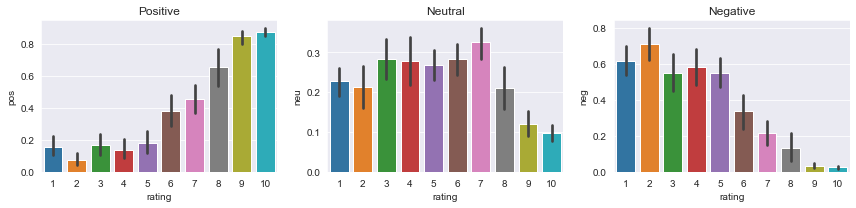

In [34]:
reviews = scrapping_movie_reviews(movies[3])
reviews = reviews.head(500)
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['review']
        myid = row['index']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError :
        continue
    except IndexError:
        continue

Avengers = pd.DataFrame(res).T
Avengers = Avengers.reset_index()
Avengers = Avengers.merge(reviews, how='left')
Avengers = Avengers.sort_values('index')
Avengers.to_csv('Avengers.csv')
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Avengers, x='rating', y='pos', ax=axs[0])
sns.barplot(data=Avengers, x='rating', y='neu', ax=axs[1])
sns.barplot(data=Avengers, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [37]:
#Printing the dataframe
Avengers

,index,neg,neu,pos,rating,title,review
0,2,0.008473,0.050284,0.941242,10,A Comic Book Triumph!,I was lucky enough to be included in the group...
1,3,0.735973,0.224252,0.039776,1,A consummate failure - here's why,"Here's why ""The Avengers"" fails so badly.1. Wr..."
2,4,0.008833,0.096105,0.895061,9,Nothing Short of Amazing,I just saw the early screening for San Diego t...
3,5,0.002199,0.010524,0.987277,9,"Great, GREAT FILM!!","Ever since the beginning of the film, I was so..."
4,6,0.959498,0.034818,0.005684,2,2 1/2 hours of wasted time,I don't want to waste more time talking about ...
...,...,...,...,...,...,...,...
397,495,0.049076,0.251681,0.699242,6,"A simple, fun, well-made summer movie","Here's a simple, fun, well-made summer movie. ..."
398,496,0.854768,0.118872,0.026360,6,Not the Best movie ever seen!,I am really disappointed by IMDb! It cannot be...
399,497,0.014135,0.056943,0.928922,10,bravo bravo!!!!!,The Avengers is a smash! This movie was very w...
400,498,0.002875,0.015536,0.981589,10,Best Marvel Film Ever!!!,This film was great. It had everything. Heroes...


### 5th movie : Star Wars

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

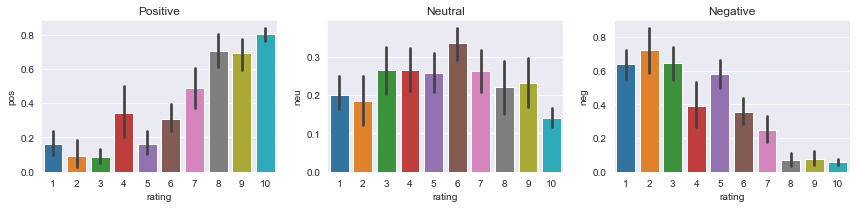

In [35]:
reviews = scrapping_movie_reviews(movies[4])
reviews = reviews.head(500)
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['review']
        myid = row['index']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError :
        continue
    except IndexError:
        continue

Star_Wars = pd.DataFrame(res).T
Star_Wars = Star_Wars.reset_index()
Star_Wars = Star_Wars.merge(reviews, how='left')
Star_Wars = Star_Wars.sort_values('index')
Star_Wars.to_csv('Star_Wars.csv')
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Star_Wars, x='rating', y='pos', ax=axs[0])
sns.barplot(data=Star_Wars, x='rating', y='neu', ax=axs[1])
sns.barplot(data=Star_Wars, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [36]:
#Printing the dataframe
Star_Wars

,index,neg,neu,pos,rating,title,review
0,1,0.204268,0.401637,0.394094,10,The film that changed the world,Star wars made epic fantasy real. For a genera...
1,2,0.003742,0.026614,0.969644,10,No words to say,There's not much to say about this movie this ...
2,3,0.007734,0.042429,0.949837,10,Where It All Began-----10/10,I can never pick a favorite movie because diff...
3,4,0.877824,0.101096,0.021080,1,The most over-rated movie of all time.,I liked this movie when it first came out. As...
4,5,0.047332,0.396076,0.556592,10,The greatest cinematic epic of all time begins...,Here begins the greatest cinematic epic of all...
...,...,...,...,...,...,...,...
423,495,0.034339,0.117818,0.847843,10,Greatest movie ever made innit,My deepest pity goes out to anyone who picks a...
424,496,0.001757,0.016402,0.981842,10,The First Star Wars movie is Also one of my Fa...,The characters are all well-defined! The plot ...
425,497,0.010497,0.040138,0.949365,10,Better than going to Toshi station to pick up ...,"Ignoring the amazing score, the great story an..."
426,498,0.026566,0.329827,0.643607,10,This is how the story was born,Star Wars. Episode 1. The Phantom Menace....An...
